In [134]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, interactive
import ipywidgets as ipywidgets
from google.colab import widgets
print(torch.__version__)
from google.colab import drive
drive.mount('/content/gdrive')

2.5.1+cu121
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [135]:
# cheating in some variables here from some other data processing I did in a different project
MEAN_LAT = 38.28132872306216
MEAN_LNG = -91.65855796075903

In [136]:
optimized_model = torch.load('/content/gdrive/My Drive/Colab Notebooks/optimized_model.pth')

# [k_loss, k_init_centroids, k_final_centroids, k_end_centroid_count] is the consturction of the optimized model
k_loss = optimized_model[0]
k_init_centroids = optimized_model[1]
k_final_centroids = optimized_model[2]
k_end_centroid_count = optimized_model[3]

print('loaded')

loaded


<ipython-input-136-bd5af873db26>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimized_model = torch.load('/content/gdrive/My Drive/Colab Notebooks/optimized_model.pth'

In [137]:
# print('k_loss')
# print(k_loss)
# print('initial centroids')
# print(k_init_centroids)
# print('final centroids')
# print(k_final_centroids)
# print('ending centroid count')
# print(k_end_centroid_count)

In [138]:
# #
# copied from the print statement of the creation of the model
#         [ 1.7631e+01,  2.4580e+00],
#         [ 9.4034e+00, -4.9703e+00]], dtype=torch.float64)]
# [0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 20, 21, 22, 23, 23, 24, 24, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 32, 33, 34,

# looks like it worked!!!

# success!!

In [139]:
# now need to save the test set as a model
k_means_data = torch.load('/content/gdrive/My Drive/Colab Notebooks/k_means_model_data.pth')

# [training_set, testing_set, LAT_RANGE, LNG_RANGE, LAT_SHIFT, LNG_SHIFT]
training_set = k_means_data[0]
testing_set = k_means_data[1]
LAT_RANGE = k_means_data[2]
LNG_RANGE = k_means_data[3]
LAT_SHIFT = k_means_data[4]
LNG_SHIFT = k_means_data[5]
print("lat range")
print(LAT_RANGE)
print("lng range")
print(LNG_RANGE)
print("lat shift")
print(LAT_SHIFT)
print("lng shift")
print(LNG_SHIFT)
print('training set')
print(training_set)
print('testing set')
print(testing_set)


print(' ')
print('loaded successfully')

lat range
24.506700000000002
lng range
57.52810000000001
lat shift
-12.962128723062076
lng shift
-32.49824203924092
training set
tensor([[ -4.6438,  -7.6205],
        [ 17.6918,   2.4979],
        [ 15.4640,   4.7245],
        ...,
        [-26.5661,  -3.9594],
        [  6.4938,  -3.1005],
        [-14.5762,  -6.5127]], dtype=torch.float64)
testing set
tensor([[ -5.1192,  -5.5147],
        [ 10.4223,  -9.5643],
        [ 14.0229,   0.8094],
        ...,
        [-28.3583,  -3.6084],
        [  3.0228,  -7.7388],
        [ -3.1637,   0.6025]], dtype=torch.float64)
 
loaded successfully


<ipython-input-139-38b108dbbe48>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  k_means_data = torch.load('/content/gdrive/My Drive/Colab Notebooks/k_means_model_data.pth'

County Location Data has already been downloaded.
county data shape:  torch.Size([3109, 2])
county data:  tensor([[-26.5661,  -3.9594],
        [  3.8418,   3.5588],
        [ -3.7352,  -8.4235],
        ...,
        [ -8.5972,  -4.6648],
        [ -6.0431, -11.3528],
        [-11.9214,  -6.4320]], dtype=torch.float64)


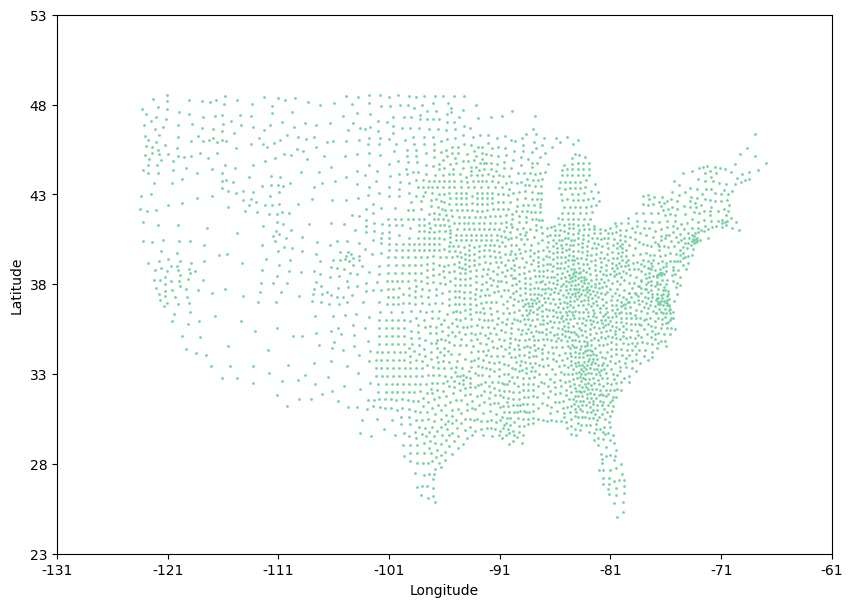

In [140]:
# copying in the draw counties method for our visualizations
drawing_data = 'https://www.tyro.work/cont-us-counties-latlng-normalized.csv'
if not os.path.exists('/content/cont-us-counties-latlng-normalized.csv'):
  !wget $drawing_data
else:
  print("County Location Data has already been downloaded.")

drawing_df = pd.read_csv('/content/cont-us-counties-latlng-normalized.csv')
draw_lat_tensor = torch.tensor(drawing_df['lat'].values)
draw_lat_tensor = draw_lat_tensor.reshape(-1, 1)
draw_lng_tensor = torch.tensor(drawing_df['lng'].values)
draw_lng_tensor = draw_lng_tensor.reshape(-1, 1)
# i thought we needed to vstack these, but we actually need hstack
draw_lnglat_tensor = torch.hstack((draw_lng_tensor, draw_lat_tensor))
print("county data shape: ", draw_lnglat_tensor.shape)
print('county data: ', draw_lnglat_tensor)
# these constants will be useful for randomizing our centroids
lat_max = draw_lat_tensor.max().item()
lat_min = draw_lat_tensor.min().item()
lng_max = draw_lng_tensor.max().item()
lng_min = draw_lng_tensor.min().item()

def draw_counties():
  plt.figure(figsize = (10,7))
  plt.scatter(draw_lnglat_tensor[:, 0], draw_lnglat_tensor[:, 1], c='#79d2a4', marker='.', s=4, label='U.S. Counties')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  # Instead of converting all the data back to normal latitudes and longitudes, I'm gonna just hack the axis x_labels
  x_locs, x_labels = plt.xticks()
  x_labels = [int(item + MEAN_LNG) for item in x_locs]
  plt.xticks(x_locs, x_labels)
  y_locs, y_labels = plt.yticks()
  y_labels = [int(item + MEAN_LAT) for item in y_locs]
  plt.yticks(y_locs, y_labels)

# now we have a method to quickly draw the county locations
draw_counties()

In [141]:
def draw_k(K = 225, Show_Initial_Centroids=False):
  grid.clear_cell()
  draw_counties()
  plt.scatter(k_final_centroids[K][:, 0], k_final_centroids[K][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
  plt.title(f'K-Means Optimized Centroids For K=225')
  plt.legend()
  plt.show()
  return # f'{K} Centroids, and initials are {"on" if Show_Initial_Centroids else "off"}'
# interact(choose_k, K=(1, 350))

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

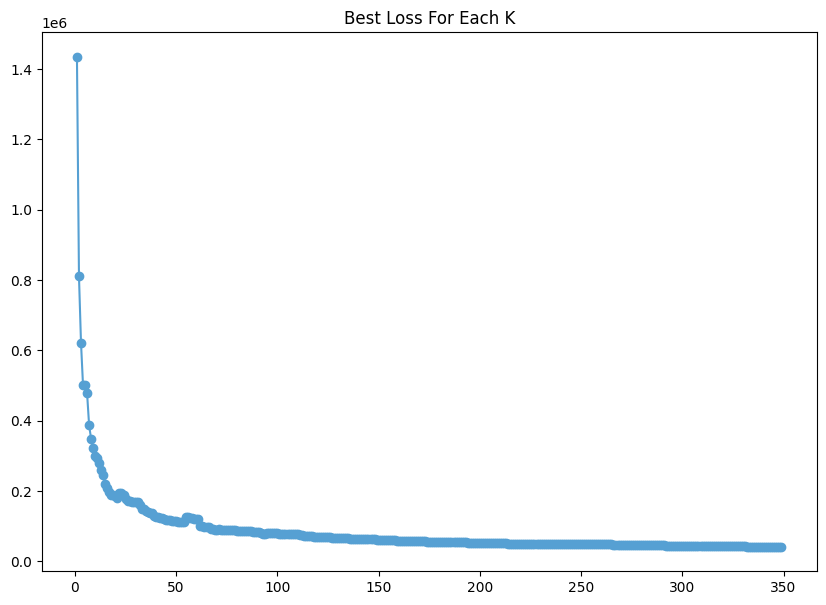

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

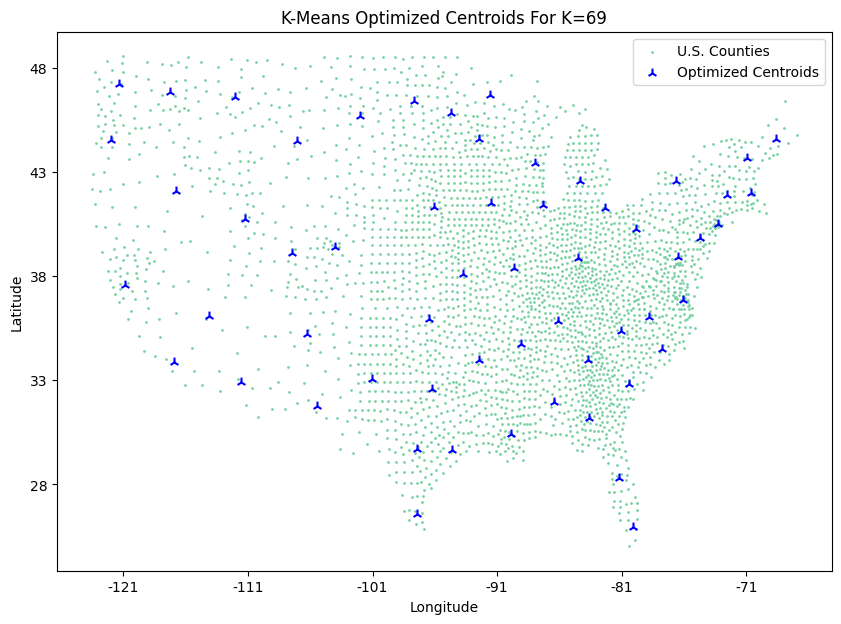

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

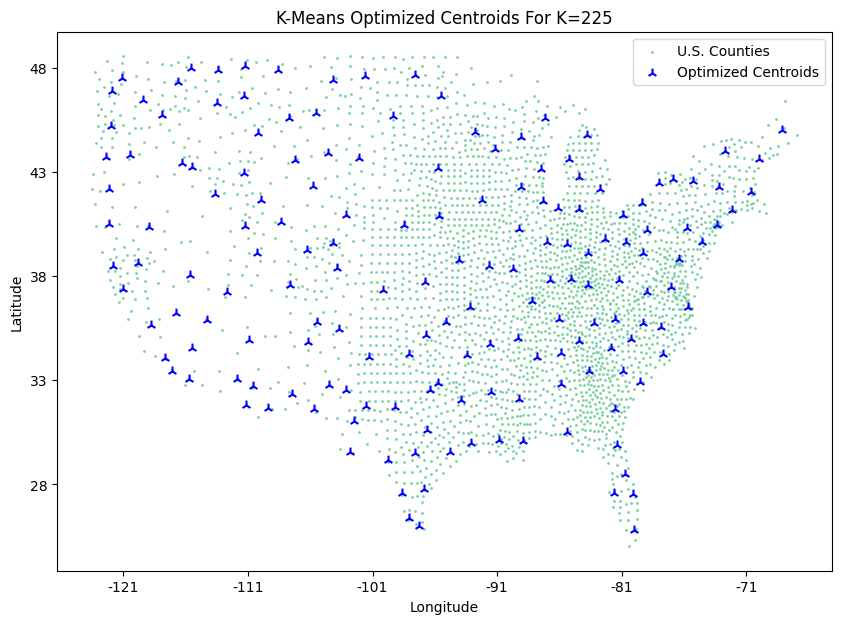

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=225, description='K', max=349, min=1), Checkbox(value=False, description…

<IPython.core.display.Javascript object>

In [142]:
# optimized_model = [k_loss, k_init_centroids, k_final_centroids, k_end_centroid_count]
ks = [i for i in range(350)]
# print(len(ks), len(k_loss))

grid = widgets.Grid(2, 2)

def draw_k(K = 225, Show_Initial_Centroids=False):
  # grid.clear_cell(1, 1)
  draw_counties()
  plt.scatter(k_final_centroids[K][:, 0], k_final_centroids[K][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
  plt.title(f'K-Means Optimized Centroids For K={K}')
  plt.legend()
  plt.show()
  return # f'{K} Centroids, and initials are {"on" if Show_Initial_Centroids else "off"}'

with grid.output_to(0, 1):
  plt.figure(figsize = (10,7))
  plt.plot(ks[1:], k_loss[1:], c='#56a0d3', marker='o', label='Best Loss For K')
  plt.title(f'Best Loss For Each K')
  plt.show()

with grid.output_to(0, 0):
  # to test let's plots 69 and 225
  draw_counties()
  plt.scatter(k_final_centroids[69][:, 0], k_final_centroids[69][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
  plt.title(f'K-Means Optimized Centroids For K=69')
  plt.legend()
  plt.show()

with grid.output_to(1, 0):
  # to test let's plots 69 and 225
  draw_counties()
  plt.scatter(k_final_centroids[225][:, 0], k_final_centroids[225][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
  plt.title(f'K-Means Optimized Centroids For K=225')
  plt.legend()
  plt.show()

with grid.output_to(1,1):
  # draw_counties()
  interactive_plot = interact(draw_k, K=(1, 349))


# # to test let's plots 69 and 225
# draw_counties()
# plt.scatter(k_final_centroids[69][:, 0], k_final_centroids[69][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
# plt.title(f'K-Means Optimized Centroids For K=225')
# plt.legend()

# # to test let's plots 69 and 225
# draw_counties()
# plt.scatter(k_final_centroids[225][:, 0], k_final_centroids[225][:, 1], c='b', s=50, marker='2', label='Optimized Centroids')
# plt.title(f'K-Means Optimized Centroids For K=225')
# plt.legend()

In [143]:
# creating a slider with ipywidgets
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
def multivariate(K = 225, Show_Initial_Centroids=False):
  return f'{K} Centroids, and initials are {"on" if Show_Initial_Centroids else "off"}'
interact(multivariate, K=(1, 350))

interactive(children=(IntSlider(value=225, description='K', max=350, min=1), Checkbox(value=False, description…

<function __main__.multivariate(K=225, Show_Initial_Centroids=False)>